In [1]:
import math
import pandas as pd
import joblib
import numpy as np
# from numpy.random import seed seed(1) 
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

import tensorflow
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf




%matplotlib inline

In [2]:
df = pd.read_csv('cost.csv')


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  144 non-null    object 
 1   cost    144 non-null    int64  
 2   total   144 non-null    int64  
 3   t/c     144 non-null    float64
 4   name    144 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 5.8+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_8984\4227439505.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

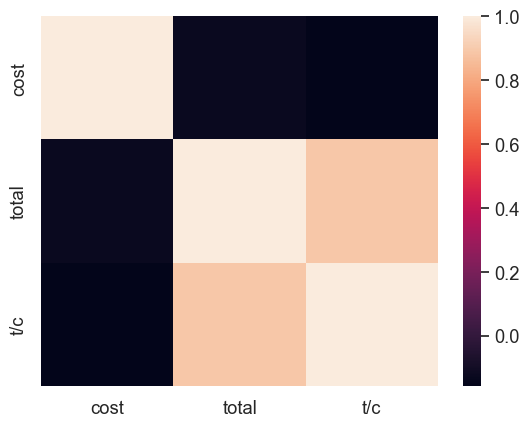

In [4]:

sns.heatmap(df.corr())

In [5]:

# dataset = df.values

# X = df[['year','ha','mt/ha','mt']]
# y = df[['name']]

# dataset
data = df
y1 = np.array(data[['total']])


In [6]:
from sklearn.feature_extraction import DictVectorizer

cols = data[['county','name']]
mapping_mt = {}

for col in cols:
  
  mapping_mt[col] = {name: i for i, name in enumerate(data[col].unique())}
def mapping_func(row):
  return pd.Series([mapping_mt[col][row[col]] for col in cols])


x1 = data.apply(mapping_func, axis=1)
t_c = data[['t/c']]
c = data[['cost']]

x1.insert(loc=0,column=4,value=t_c)
x1.insert(loc=2,column=2,value=c)

x1 


,4,0,2,1
0,13.333333,0,60000,0
1,7.733333,1,60000,0
2,12.000000,2,60000,0
3,3.200000,3,60000,0
4,20.000000,4,60000,0
...,...,...,...,...
139,13.333333,13,45000,7
140,0.310000,14,45000,7
141,11.666667,15,45000,7
142,56.666667,16,45000,7


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

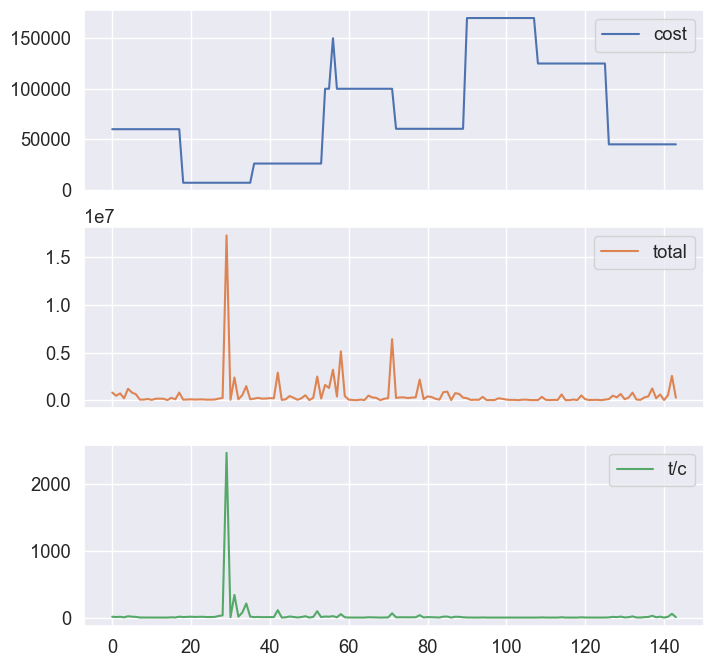

In [7]:
df.plot(subplots=True, figsize=(8,8))

<AxesSubplot: >

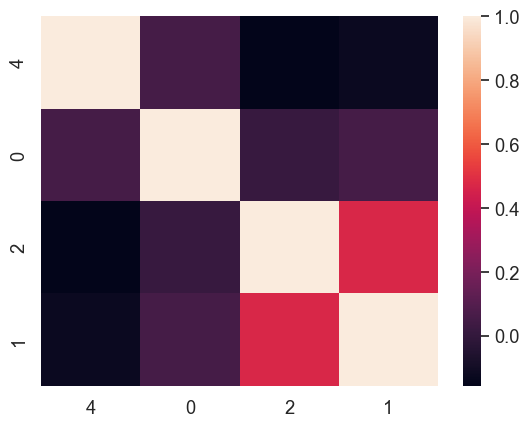

In [8]:
sns.heatmap(x1.corr())

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x1, y1)


In [10]:
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale = scaler_x.transform(X_train)
scaler_x.fit(X_val)
xval_scale = scaler_x.transform(X_val) 

scaler_y.fit(y_train)
ytrain_scale = scaler_y.transform(y_train) 
scaler_y.fit(y_val) 
yval_scale = scaler_y.transform(y_val)



In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features1 = PolynomialFeatures(degree=2)
x_poly1 = polynomial_features1.fit_transform(X_train)
model1 = LinearRegression()
model1.fit(x_poly1, y_train)
y_poly_pred1 = model1.predict(x_poly1)

In [12]:
x_poly1.shape

(108, 15)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

rmse1 = np.sqrt(mean_squared_error(y_train,y_poly_pred1))
r21 = r2_score(y_train, y_poly_pred1)
print(rmse1)
print(r21)

0.00011897215589417322
1.0


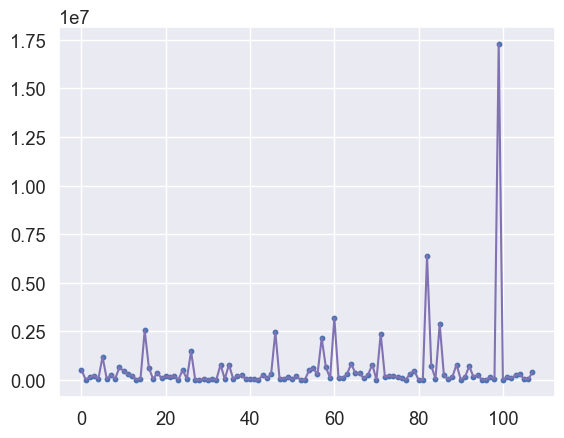

In [14]:
import operator
xm = np.arange(0, len(X_train),1)
plt.scatter(xm, y_train,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xm, y_poly_pred1), key=sort_axis)
xm, y_poly_pred1 = zip(*sorted_zip)
plt.plot(xm, y_poly_pred1, color='m')
plt.show()


In [15]:
def crop_price_prediction():


    print("Input t/c")
    t_c = input()
    t_c = float(t_c)

    print("input county")
    county = input()



    
    print("Input cost")
    cost = input()
    cost = int(cost)

  

    print("input name")
    name = input()


    
    

    print(county,cost, t_c,name)
    v = [[t_c,mapping_mt['county'][county],cost,mapping_mt['name'][name]]]
    v = polynomial_features1.fit_transform(v)

    
    crop_price = model1.predict(v)
    # crop_yield = scaler_y.inverse_transform(crop_yield) 
    
    
    print(crop_price)

In [16]:
crop_price_prediction()

Input t/c
input county
Input cost
input name
Bomet 60000 1.0 beans
[[60000.00008262]]


In [17]:
joblib.dump(model1, 'cost.pkl')

['cost.pkl']

In [18]:
joblib.dump(polynomial_features1, 'poly_reg_mt.pkl')

['poly_reg_mt.pkl']

In [19]:
%store mapping_mt

Stored 'mapping_mt' (dict)


In [ ]:
# model1.save('cost.h5')